KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: RankWarning: Polyfit may be poorly conditioned
C:\Users\antoi\anaconda3\lib\site-packages\ipykernel_launcher.py:87: Ran

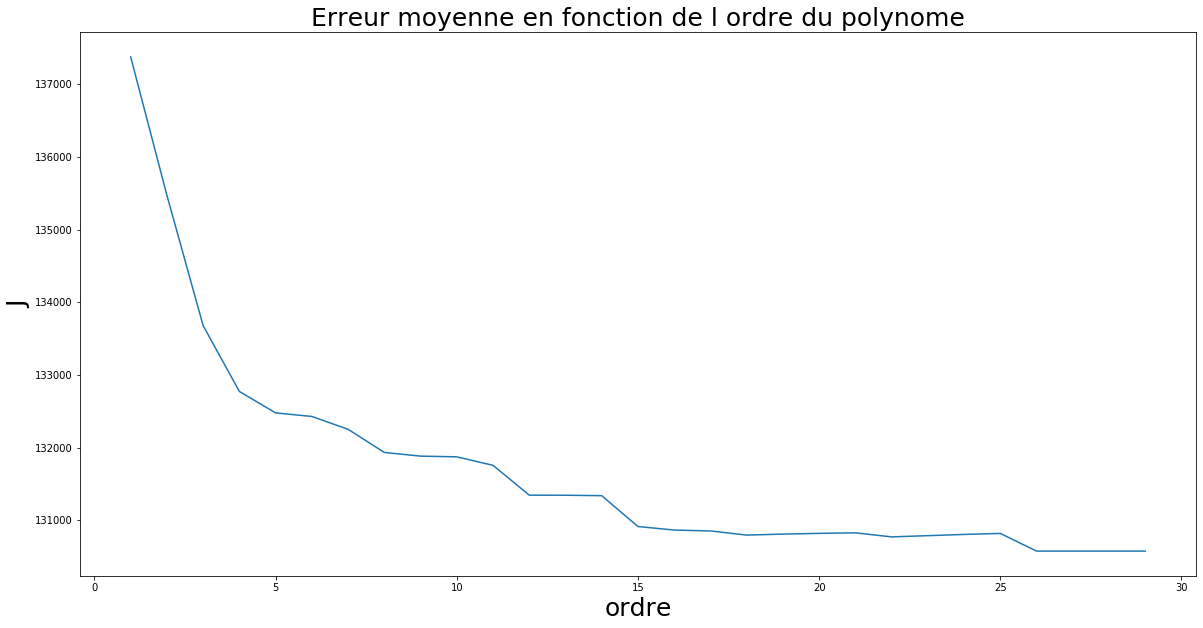

Avec cette courbe il semble judicieux de se servir des modèles de regression linéaire d'ordre 6 et 15 

on prendra lordre 6 sous contrainte de complexité en mémoire et en temps, de plus cela permet d'éviter un potentiel overfitting si on prend un ordre trop grand
Resultat regression linéaire d'ordre 6 avec 17 paramètres
L erreur moyenne en valeur absolue est de 33.05108525081321 €



resultats knn avec 17 paramètres :
L erreur moyenne en valeur absolue est de 23047.60299051787 €

  Synthèse : l'erreur moyenne en valeur absolue serait mieux présenté avec la régression polynmiale d'ordre 6 

Evaluons la performance de nos résultat avec le knn et la regression polynomiale d ordre 6 à l aide de la Cross validation

Précision knn obtenue avec la cross validation:
[0.72011367 0.7561898  0.73321652 0.74943271 0.66335511]


Précision moyenne knn:
0.7244615640177086


[[-7.14757189e-04 -7.64962496e-03 -9.03290727e-03 -6.46125987e-03
  -4.20414366e-03]
 [ 1.37538039e-01  4.01316027e-02  4.577945

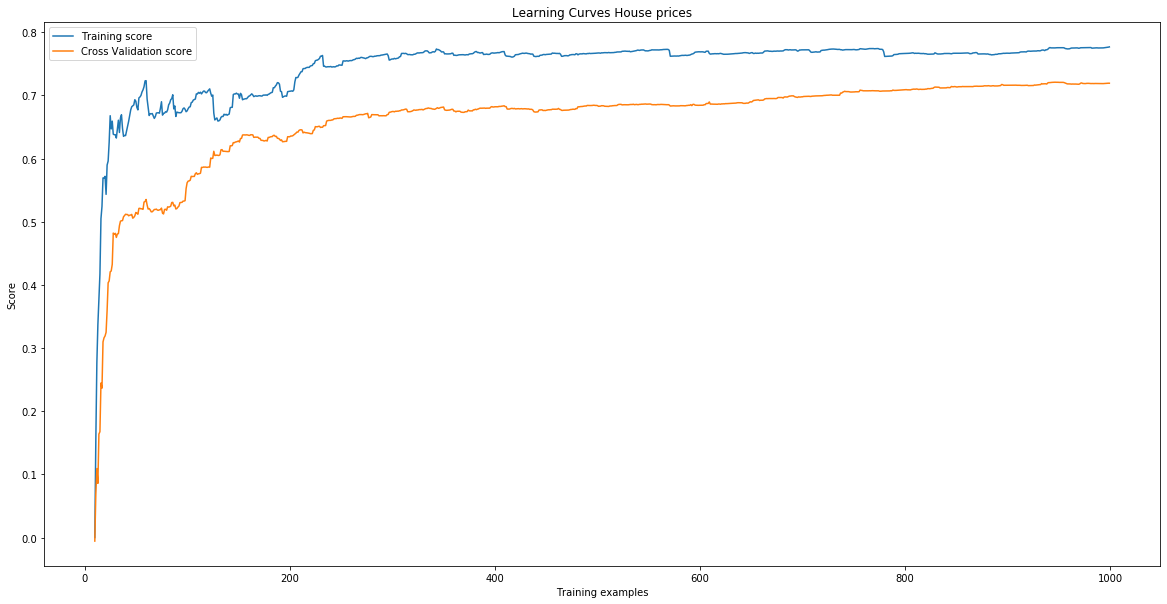

Précision regression linéaire obtenue avec la cross validation:
[0.81697877 0.80085335 0.79302756 0.79314846 0.60589377]


Précision moyenne regression linéaire:
0.7619803823017284


[[-2.19891913  0.14560473 -0.03592364 -0.27445115  0.11954919]
 [-1.79433002 -0.34021391 -0.31203435 -0.321005   -0.14326962]
 [-1.75243699 -0.27780325 -0.26181621 -0.24768918 -0.08909542]
 ...
 [ 0.80222028  0.80931426  0.77108274  0.6141973   0.83300386]
 [ 0.80227637  0.80927532  0.77111423  0.61414555  0.83300035]
 [ 0.802301    0.80936853  0.77111096  0.6140474   0.83296461]]


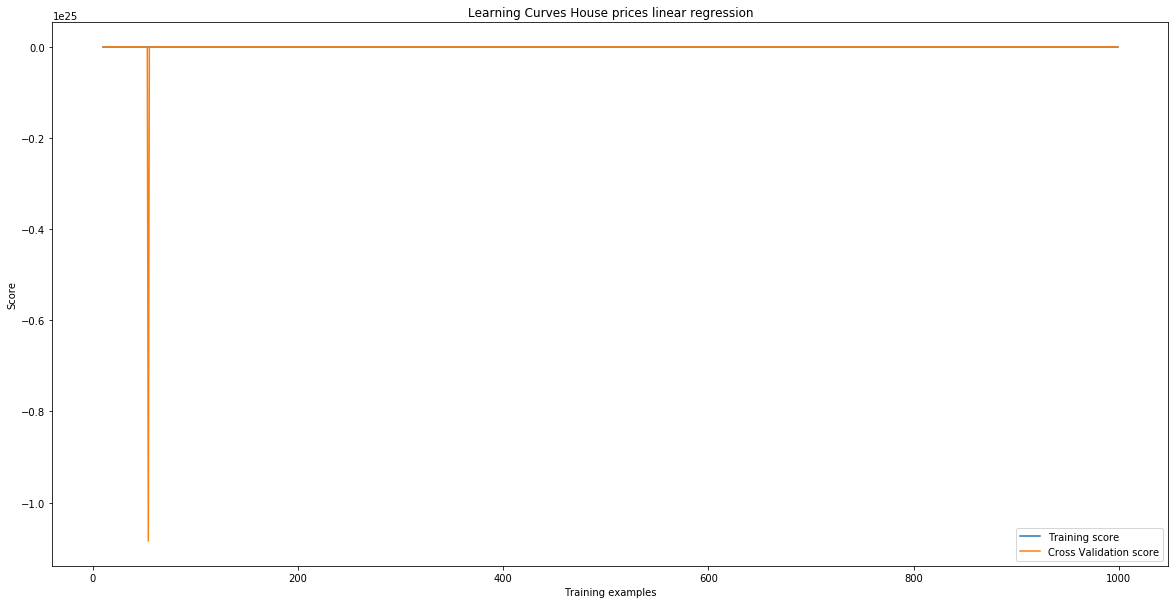

Nous ne sommes pas parvenue à afficher la cross validation avec la regression linéaire, surement pour cause de mémoire 


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#on transforme le csv en tableau
house_data_train = pd.read_csv('house_train.csv',sep=',',header = 0)

#on regarde la corrélation avec le prix
house_data_corr=house_data_train.corr()
print(house_data_corr['SalePrice'].sort_values())
print("\n On va se servir du coeficient de correlation pour déterminer quels paramètres sont pertinent à prendre en compte.")
print("On selectionne tout les paramètres  dont le coéfficient de corrélation est supérieur à 0,3; soit 17 paramètres \n")

#regression linéaire à 2 paramètres : on détermine l'erreur à  2 paramètres a l'aide de la régression linéaire
 
house_data_parameters = ['TotalBsmtSF','TotRmsAbvGrd']

house_prices = house_data_train['SalePrice']
house_data_train_relevant_parameters = house_data_train[house_data_parameters]

#Préparation du model 

from sklearn.linear_model import LinearRegression
sklearn_LinearRegression = LinearRegression(fit_intercept=True)


sklearn_LinearRegression.fit(house_data_train_relevant_parameters, house_prices)

#Prédiction
houses_prices_predicted = sklearn_LinearRegression.predict(house_data_train_relevant_parameters)

 
from sklearn.metrics import mean_absolute_error
performance_sklearn_LinearRegression = mean_absolute_error(houses_prices_predicted,house_prices)
print('Resultat regression linéaire avec 2 paramètre :')
print('L erreur moyenne en valeur absolue est de ' + str(performance_sklearn_LinearRegression) + ' €\n')

# on regarde maintenant l'erreur moyenne avec 17 paramètres que l'on choisi avec la corrélation.


house_data_parameters =['1stFlrSF','OverallQual','GrLivArea','MasVnrArea','Fireplaces','OpenPorchSF','BsmtFinSF1','WoodDeckSF','2ndFlrSF','TotalBsmtSF','TotRmsAbvGrd','FullBath','GarageYrBlt','GarageCars','GarageArea','YearBuilt','YearRemodAdd','SalePrice']

#Nettoyage des données: on retire toutes les données du type NA ou null

# les valeurs aberrantes (manquantes , NAN , Null) sont une minorité donc a décider de les supprimer car on pense que cela n'aura pas une grande influence sur notre modèle.
house_data_selected_to_clean = house_data_train[house_data_parameters]
house_data_cleaned_no_nan = house_data_selected_to_clean.dropna()


house_data_parameters =['1stFlrSF','OverallQual','GrLivArea','MasVnrArea','Fireplaces','OpenPorchSF','BsmtFinSF1','WoodDeckSF','2ndFlrSF','TotalBsmtSF','TotRmsAbvGrd','FullBath','GarageYrBlt','GarageCars','GarageArea','YearBuilt','YearRemodAdd']
house_train_data_selected_no_nan = house_data_cleaned_no_nan[house_data_parameters]
house_train_data_price = house_data_cleaned_no_nan['SalePrice']
 

# avec plusieurs parametres

house_data_parameters =['1stFlrSF','OverallQual','GrLivArea','MasVnrArea','Fireplaces','OpenPorchSF','BsmtFinSF1','WoodDeckSF','2ndFlrSF','TotalBsmtSF','TotRmsAbvGrd','FullBath','GarageYrBlt','GarageCars','GarageArea','YearBuilt','YearRemodAdd']
house_data_train_relevant_parameters = house_train_data_selected_no_nan[house_data_parameters]
house_data_train_relevant_parameters.head(n=7)
house_prices = house_train_data_price


#Préparation du model
from sklearn.linear_model import LinearRegression
sklearn_LinearRegression = LinearRegression(fit_intercept=True)
sklearn_LinearRegression.fit(house_data_train_relevant_parameters, house_prices)
houses_prices_predicted = sklearn_LinearRegression.predict(house_data_train_relevant_parameters)
from sklearn.metrics import mean_absolute_error
performance_sklearn_LinearRegression = mean_absolute_error(houses_prices_predicted,house_prices)
print('Resultat regression linéaire avec 17 paramètre :')
print('L erreur moyenne en valeur absolue est de ' + str(performance_sklearn_LinearRegression) + ' €\n')


print('Avec 17 paramètres pertinent on a une baisse de l erreur moyenne en valeur absolue')


# étudions d'autres modèle afin de voir si on peut encore réduire l'erreur moyenne.

# Méthode 1 : Etude de l'erreur moyenne en fonction du polynome (régression polynomiale) afin de réduire l'erreur moyenne 
# la regression linéaire est une régression polynomiale d'ordre 1

def J_mean_absolute_error(X,Y,degree):
    polynomial_regression_order_degree = np.polyfit(X,Y,degree)
    linear_regression = np.poly1d(polynomial_regression_order_degree)
    return mean_squared_error(Y, linear_regression(X))
J = []
for i in np.arange(1,30):
    J.append(J_mean_absolute_error(y,x,i))
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,30),J)
plt.xlabel('ordre',fontsize=25)
plt.ylabel('J',fontsize=25)
plt.title('Erreur moyenne en fonction de l ordre du polynome',fontsize=25)
plt.show()
print("Avec cette courbe il semble judicieux de se servir des modèles de regression linéaire d'ordre 6 et 15 \n")
print("on prendra lordre 6 sous contrainte de complexité en mémoire et en temps, de plus cela permet d'éviter un potentiel overfitting si on prend un ordre trop grand")
# avec plusieurs parametres

 
house_data_train_relevant_parameters = house_train_data_selected_no_nan[house_data_parameters]
house_data_train_relevant_parameters.head(n=7)
house_prices = house_train_data_price

#Préparation du model de regression linéaire d'ordre 6
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
#resumer linformation(moyenne par exemple)
house_data_train_relevant_parameters_predicted_prepare_for_lineaire = poly.fit_transform(house_data_train_relevant_parameters)#observe et prepare
linear_regression=LinearRegression()
linear_regression.fit(house_data_train_relevant_parameters_predicted_prepare_for_lineaire,house_prices)
predict=linear_regression.predict(house_data_train_relevant_parameters_predicted_prepare_for_lineaire)#predire les valeur de test


print("Resultat regression linéaire d'ordre 6 avec 17 paramètres")
print('L erreur moyenne en valeur absolue est de ' + str(mean_absolute_error(house_prices, predict)) + ' €\n')
print("\n")

#méthode 2 : méthode du KNN (KNeighborsRegressor) : La cible est prédite par interpolation locale des cibles associées à des voisins les plus proches dans l'ensemble d'apprentissage 
 
from sklearn.metrics import mean_absolute_error

house_data_parameters =['1stFlrSF','OverallQual','GrLivArea','MasVnrArea','Fireplaces','OpenPorchSF','BsmtFinSF1','WoodDeckSF','2ndFlrSF','TotalBsmtSF','TotRmsAbvGrd','FullBath','GarageYrBlt','GarageCars','GarageArea','YearBuilt','YearRemodAdd']
house_data_train_relevant_parameters = house_train_data_selected_no_nan[house_data_parameters]
house_data_train_relevant_parameters.head(n=7)
house_prices = house_train_data_price

#Préparation du model knn
from sklearn.neighbors import KNeighborsRegressor
sklearn_knn_regressor = KNeighborsRegressor(n_neighbors = 10)# a partir de 11 voisins l erreur moyenne augmente pour cause de overfitting nous pensons donc on a choisi 10 voisin car on avait le meilleur résultat avec 10 voisins
sklearn_knn_regressor.fit(house_data_train_relevant_parameters,house_prices)
config_to_predict = np.atleast_2d(house_data_train_relevant_parameters)
price_predicted_knn = sklearn_knn_regressor.predict(config_to_predict)

performance_knn_regression = mean_absolute_error(price_predicted_knn,house_prices)
print("resultats knn avec 17 paramètres :")
print('L erreur moyenne en valeur absolue est de ' + str(performance_knn_regression) + ' €\n')


print("  Synthèse : l'erreur moyenne en valeur absolue serait mieux présenté avec la régression polynmiale d'ordre 6 \n")

#Evaluer la performance de son modèle est une étape importante de tout projet de Machine Learning.

print('Evaluons la performance de nos résultat avec le knn et la regression polynomiale d ordre 6 à l aide de la Cross validation\n')


# Utilisation de la fonction de Cross Validation sur les house_data avec le knn


from sklearn.model_selection import cross_val_score
sklearn_cross_val_score_knn = cross_val_score(sklearn_knn_regressor, house_data_train_relevant_parameters,house_prices, cv=5)
print("Précision knn obtenue avec la cross validation:")
print(sklearn_cross_val_score_knn)
print("\n")
print("Précision moyenne knn:")
print(np.mean(sklearn_cross_val_score_knn))
print("\n")

# Courbes d'apprentissage knn


datas=house_data_train_relevant_parameters
targets=house_prices

from sklearn.utils import shuffle 
datas_shuffled, targets_shuffled = shuffle(datas, targets, random_state=0)#résoudre le problème de la non-convexité

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(sklearn_knn_regressor, datas_shuffled, targets_shuffled, train_sizes=range(10,1000), cv=5)
print(valid_scores)

import matplotlib.pyplot as plt

train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)

plt.figure(figsize=(20,10))
plt.plot(train_sizes,train_scores_mean,label='Training score')
plt.plot(train_sizes,valid_scores_mean,label='Cross Validation score')
plt.title('Learning Curves House prices')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()


#Crosse Validation de la Regression linéaire avec 17 paramètres

# Utilisation de la fonction de Cross Validation sur les houses_data avec la Regression linéaire
from sklearn.model_selection import cross_val_score
sklearn_cross_val_score_linear = cross_val_score(sklearn_LinearRegression, house_data_train_relevant_parameters,house_prices, cv=5)
print("Précision regression linéaire obtenue avec la cross validation:")
print(sklearn_cross_val_score_linear)
print("\n")
print("Précision moyenne regression linéaire:")
print(np.mean(sklearn_cross_val_score_linear))
print("\n")

# Courbes d'apprentissage Regression linéaire


datas=house_data_train_relevant_parameters
targets=house_prices


from sklearn.utils import shuffle
datas_shuffled, targets_shuffled = shuffle(datas, targets, random_state=0)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(sklearn_LinearRegression, datas_shuffled, targets_shuffled, train_sizes=range(10,1000), cv=5)
print(valid_scores)

import matplotlib.pyplot as plt

train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)

plt.figure(figsize=(20,10))
plt.plot(train_sizes,train_scores_mean,label='Training score')
plt.plot(train_sizes,valid_scores_mean,label='Cross Validation score')
plt.title('Learning Curves House prices linear regression')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()



print("Nous ne sommes pas parvenue à afficher la cross validation avec la regression linéaire, surement pour cause de mémoire ")